# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train =pd.read_csv("titanic_train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# finding the missing data

In [ ]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

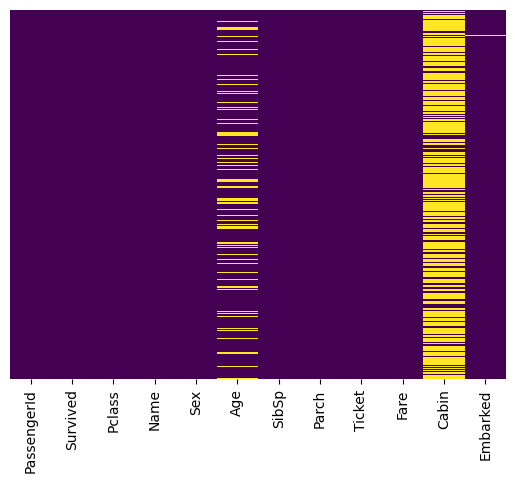

In [5]:
sns.heatmap(train.isnull() ,yticklabels=False,cbar=False,cmap='viridis')

# handeling the missing data or nan values

<Axes: xlabel='Survived', ylabel='count'>

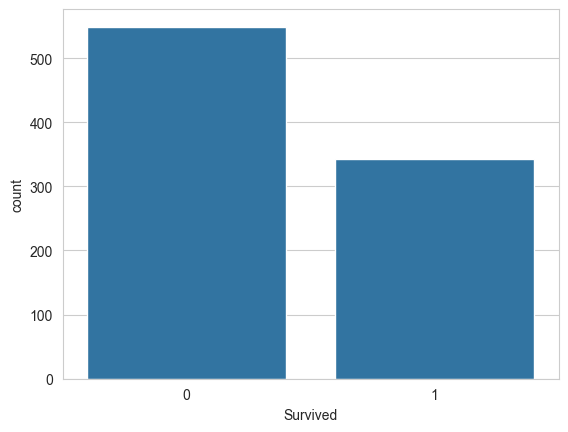

In [6]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

<Axes: xlabel='Survived', ylabel='count'>

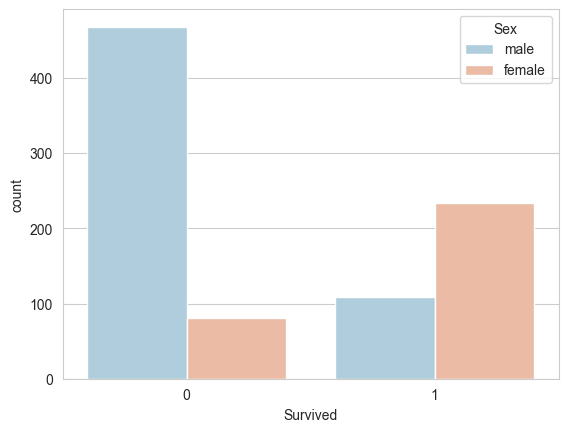

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived' ,hue='Sex' ,data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

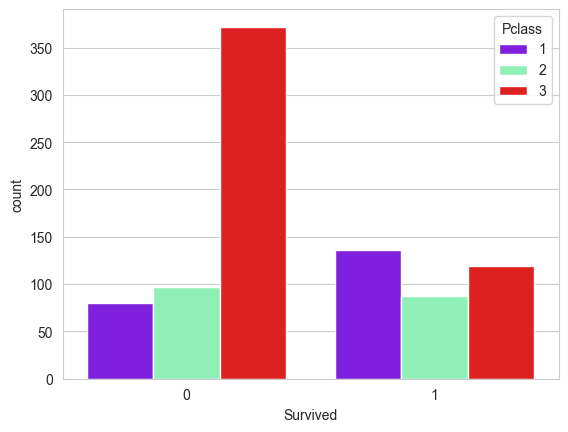

In [8]:
# sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train,palette='rainbow')

C:\Users\dell\AppData\Local\Temp\ipykernel_34644\214273912.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,color='darkred', bins=40)


<Axes: xlabel='Age'>

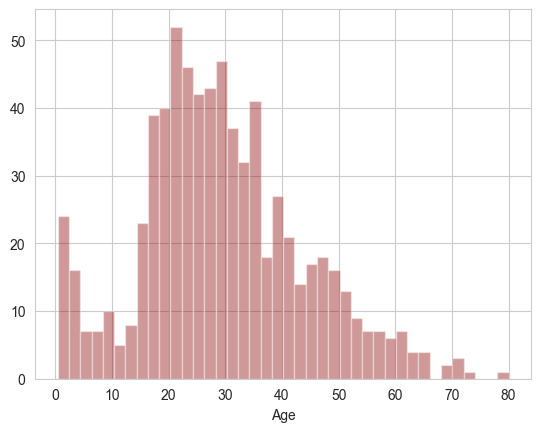

In [9]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred', bins=40)

<Axes: >

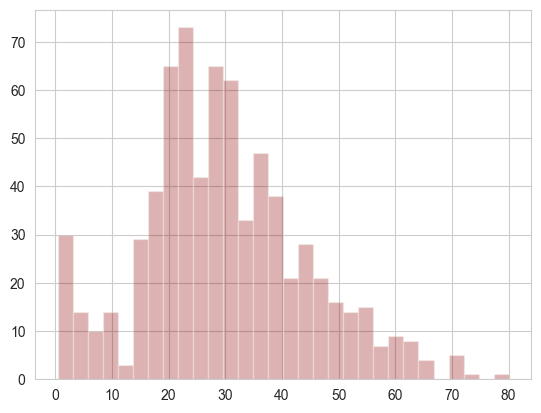

In [10]:
train['Age'].hist(bins=30, color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

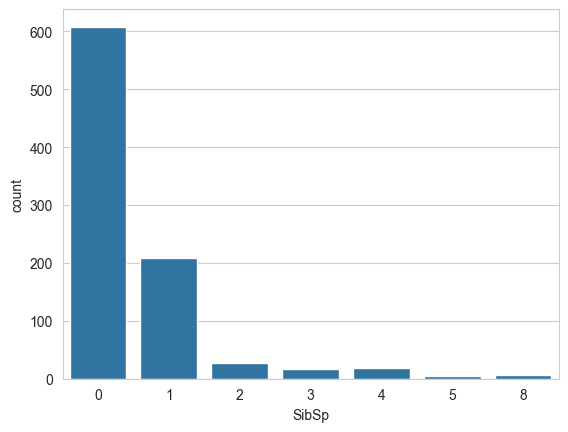

In [11]:
sns.countplot(x='SibSp',data=train)

<Axes: >

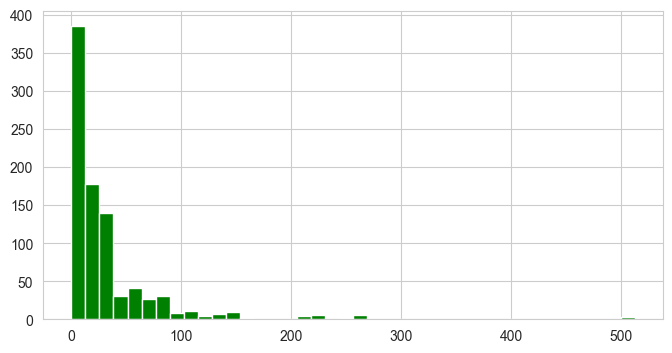

In [12]:
train['Fare'].hist(color='green',bins=40 ,figsize=(8,4))

# removing null values and nan values /data cleaning

C:\Users\dell\AppData\Local\Temp\ipykernel_34644\4135693399.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

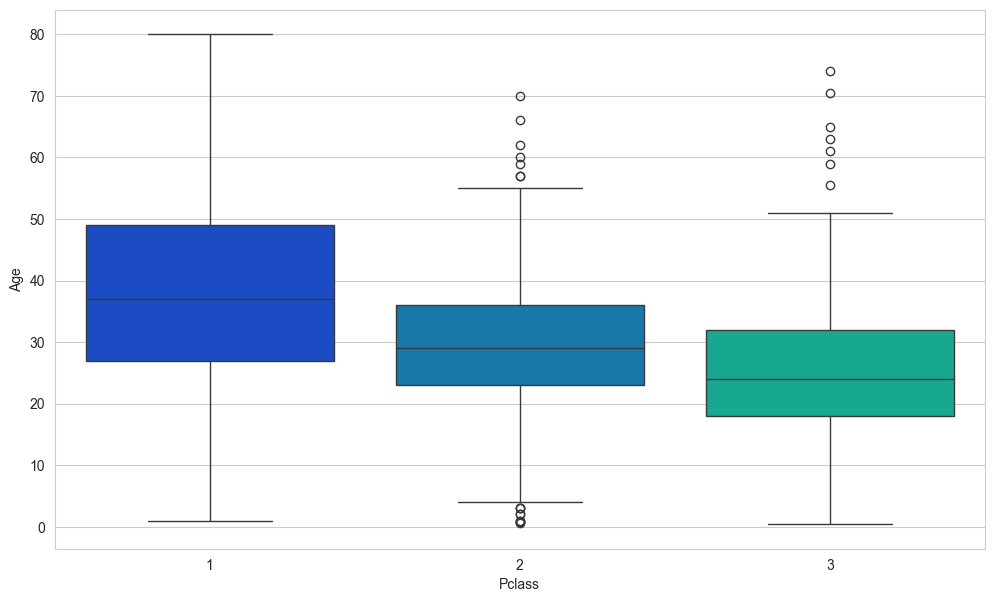

In [13]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

now writing function of replacing

In [14]:
def input_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age']=train[['Age','Pclass']].apply(input_age, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_34644\1699345603.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age=cols[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_34644\1699345603.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

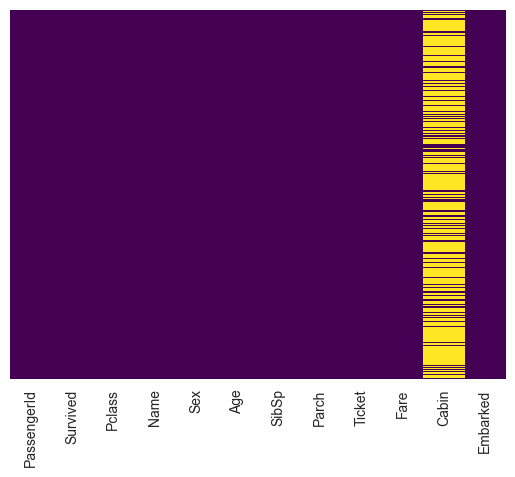

In [16]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\dell\AppData\Local\Temp\ipykernel_34644\849093465.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')


<Axes: xlabel='Pclass', ylabel='Fare'>

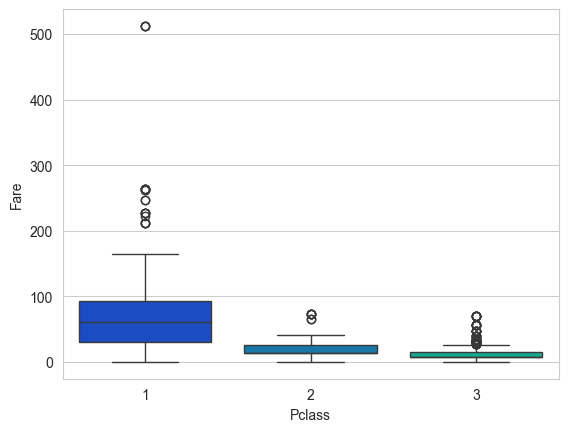

In [17]:
# plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Fare',data=train,palette='winter')

In [18]:
def input_fare(cols):
    Fare=cols[0]
    Pclass=cols[1]
    if pd.isnull(Fare):
        if Pclass==1:
            return 70
        elif Pclass==2:
            return 10
        else:
            return 5
    return Fare

In [19]:
train['Fare']=train[['Fare','Pclass']].apply(input_fare, axis=1)

C:\Users\dell\AppData\Local\Temp\ipykernel_34644\2396858405.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Fare=cols[0]
C:\Users\dell\AppData\Local\Temp\ipykernel_34644\2396858405.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass=cols[1]


<Axes: >

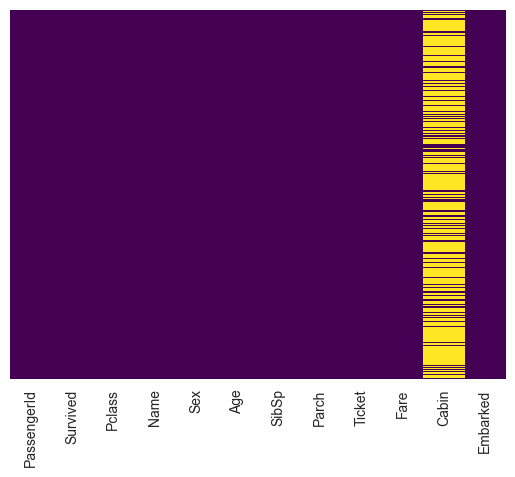

In [20]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

now we can do for cabin

In [21]:
train.dropna(inplace=True)

<Axes: >

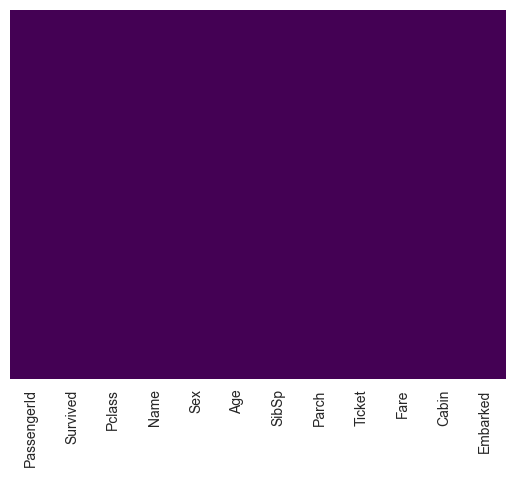

In [22]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


## Converting the categorical features

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    float64
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 20.5+ KB


In [25]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [26]:
sex =pd.get_dummies(train['Sex'],drop_first=True)
embarked =pd.get_dummies(train['Embarked'],drop_first=True)

In [27]:
train.drop(['Sex','Embarked','Name','Ticket','Cabin'],axis=1,inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [29]:
train =pd.concat([train,sex,embarked],axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,True


## Building Logistic Regression Model

# train test split

In [31]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,38.0,1,0,71.2833,False,False,False
3,4,1,35.0,1,0,53.1000,False,False,True
6,7,1,54.0,0,0,51.8625,True,False,True
10,11,3,4.0,1,1,16.7000,False,False,True
11,12,1,58.0,0,0,26.5500,False,False,True


In [32]:
train['Survived'].head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train , y_test=train_test_split(train.drop('Survived',axis=1),
                                                   train['Survived'],test_size=0.30,
                                                   random_state=101)

# training and prediction

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [37]:
predictions =logmodel.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix

In [39]:
accuracy=confusion_matrix(y_test,predictions)

In [40]:
accuracy

array([[12,  8],
       [ 5, 36]])

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)

In [42]:
predictions

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0])

In [43]:
accuracy

0.7868852459016393